In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [61]:
df= pd.read_csv("initial.csv")
df.head(5)

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0


In [62]:
df_old = df
df_old

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
...,...,...,...,...,...
11270,TeaPot,teapot,2677.0,NaN,NaN
11271,luosiyuan,tianbu,2882.0,NaN,NaN
11272,dorijanko,dorijanlendvaj,3120.0,NaN,NaN
11273,gamegame,gamegame,3218.0,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  11275 non-null  object 
 1   cf_username  11068 non-null  object 
 2   cf_rating    7437 non-null   float64
 3   cc_username  10280 non-null  object 
 4   cc_rating    10280 non-null  float64
dtypes: float64(2), object(3)
memory usage: 440.6+ KB


In [64]:
df.describe(include='all')

,ss_username,cf_username,cf_rating,cc_username,cc_rating
count,11275,11068,7437.000000,10280,10280.000000
unique,11268,10926,NaN,10149,NaN
top,1.90E+08,1.90E+08,NaN,gaurav__thakur,NaN
freq,6,5,NaN,3,NaN
mean,NaN,NaN,1373.551029,NaN,1678.185798
std,NaN,NaN,344.707169,NaN,252.891793
min,NaN,NaN,187.000000,NaN,179.000000
25%,NaN,NaN,1147.000000,NaN,1537.000000
50%,NaN,NaN,1366.000000,NaN,1695.000000
75%,NaN,NaN,1601.000000,NaN,1843.000000


In [65]:
df_filtered = df.dropna(how='any')
df_filtered

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0
5,aurinegro,aurinegro,2202.0,aurinegro,2628.0
6,retrograd,retrograd,2262.0,retrograd,2628.0
7,chris19,anudeep2011,2023.0,anudeep2011,2565.0
...,...,...,...,...,...
10269,Prince_Raj,daud43,624.0,praj0609,580.0
10270,Notanonymous,bhardwajarpit1998,1182.0,arpit_987,569.0
10272,yash1399,yash1399,979.0,yash1399,518.0
10274,hihihihipathak,praveenpathak,1581.0,hihihihipathak,460.0


<Axes: xlabel='cc_rating', ylabel='cf_rating'>

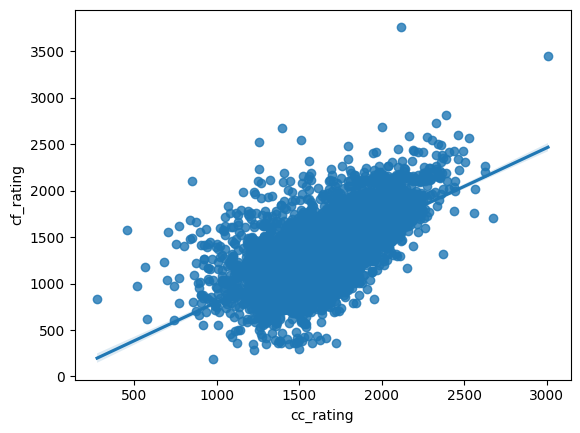

In [66]:
f = plt.figure()
ax = f.add_subplot(1,1,1)
Reg=sn.regplot(data=df_filtered,x='cc_rating',y='cf_rating',ax=ax)
Reg

In [67]:
slope,intercept= np.polyfit(df_filtered['cc_rating'],df_filtered['cf_rating'],1)
# cf= slope * cc + intercept
(slope,intercept)

(0.8315620555789333, -32.6292650731585)

In [68]:
df['cf_rating']=df['cf_rating'].fillna(slope*df['cc_rating']+intercept)

In [69]:
df['cc_rating']=df['cc_rating'].fillna((df['cf_rating']-intercept)/slope)

In [70]:
df

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.000000,peehs_moorhsum,3007.000000
1,jora,NaN,2383.890068,uwi,2906.000000
2,lala,NaN,2259.155760,kal013,2756.000000
3,wesnerm,NaN,2209.262037,wmoise,2696.000000
4,grebnesieh,grebnesieh,1703.000000,grebnesieh,2673.000000
...,...,...,...,...,...
11270,TeaPot,teapot,2677.000000,NaN,3258.481128
11271,luosiyuan,tianbu,2882.000000,NaN,3505.005123
11272,dorijanko,dorijanlendvaj,3120.000000,NaN,3791.213469
11273,gamegame,gamegame,3218.000000,NaN,3909.063964


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  11275 non-null  object 
 1   cf_username  11068 non-null  object 
 2   cf_rating    11275 non-null  float64
 3   cc_username  10280 non-null  object 
 4   cc_rating    11275 non-null  float64
dtypes: float64(2), object(3)
memory usage: 440.6+ KB


In [72]:
df.to_csv("final.csv",index=False)